# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_light, labs
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Model 1

In [ ]:
# prep data
penguins = penguins.dropna()
X1 = penguins[['bill_length_mm', 'species', 'island', 'sex', 'flipper_length_mm', 'body_mass_g', 'year']]
y1 = penguins['bill_depth_mm']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)

pipeline1 = my_pipeline.fit(X_train, y_train)
pipeline1

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
# making predictions with both training and testing data
y_pred_train = my_pipeline.predict(X_train)
y_pred_test = my_pipeline.predict(X_test)

In [ ]:
# find the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

Model 2

In [ ]:
# prep data
penguins = penguins.dropna()
X2 = penguins[['bill_length_mm']]
y2 = penguins['bill_depth_mm']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr = LinearRegression()
enc = OneHotEncoder()

my_pipeline = Pipeline(
    [ ('ols', lr)]
)

pipeline2 = my_pipeline.fit(X_train2, y_train2)
pipeline2

Pipeline(steps=[('ols', LinearRegression())])

In [ ]:
# making predictions with both training and testing data
y_pred_train2 = my_pipeline.predict(X_train2)
y_pred_test2 = my_pipeline.predict(X_test2)

# find the mean squared error
mse_train2 = mean_squared_error(y_train2, y_pred_train2)
mse_test2 = mean_squared_error(y_test2, y_pred_test2)

Model 3

In [ ]:
# prep data
penguins = penguins.dropna()
X3 = penguins[['species', 'island', 'sex']]
y3 = penguins['bill_depth_mm']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr = LinearRegression()
enc = OneHotEncoder()

ct3 = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct3), ('ols', lr)]
)

pipeline3 = my_pipeline.fit(X_train3, y_train3)
pipeline3

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
# making predictions with both training and testing data
y_pred_train3 = my_pipeline.predict(X_train3)
y_pred_test3 = my_pipeline.predict(X_test3)

In [ ]:
# find the mean squared error
mse_train3 = mean_squared_error(y_train3, y_pred_train3)
mse_test3 = mean_squared_error(y_test3, y_pred_test3)

Model 4

In [ ]:
# prep data
penguins = penguins.dropna()
X4 = penguins[['bill_length_mm', 'species', 'island', 'sex']]
y4 = penguins['bill_depth_mm']

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr = LinearRegression()
enc = OneHotEncoder()

ct4 = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct4), ('ols', lr)]
)

pipeline4 = my_pipeline.fit(X_train4, y_train4)
pipeline4

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
# making predictions with both training and testing data
y_pred_train4 = my_pipeline.predict(X_train4)
y_pred_test4 = my_pipeline.predict(X_test4)

# find the mean squared error
mse_train4 = mean_squared_error(y_train4, y_pred_train4)
mse_test4 = mean_squared_error(y_test4, y_pred_test4)

In [ ]:
model_num = [1,2,3,4]
num_predictors = [7,1,3,4]
mse_all_train = [mse_train,mse_train2, mse_train3, mse_train4]
mse_all_test = [mse_test,mse_test2, mse_test3, mse_test4]

df = pd.DataFrame({"model": model_num,
                   "num_predictors": num_predictors,
                   "mse_train": mse_all_train,
                   "mse_test": mse_all_test})
df

,model,num_predictors,mse_train,mse_test
0,1,7,0.657950,0.810853
1,2,1,3.500498,4.159430
2,3,3,0.667850,0.796762
3,4,4,0.706298,0.664726


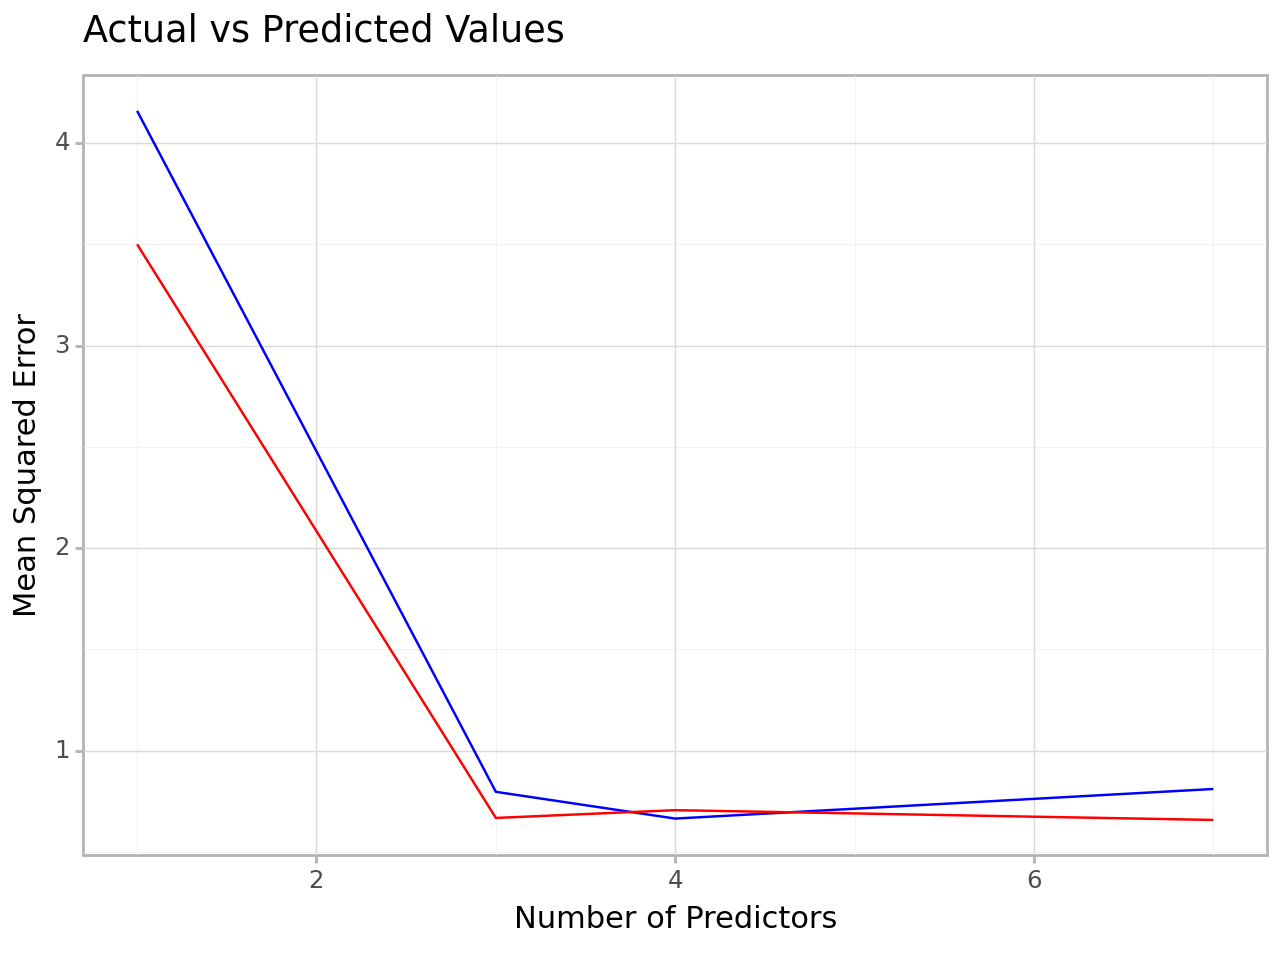

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_line, labs

plot = (ggplot(df, aes(x='num_predictors'))
    + geom_line(aes(y='mse_test'), color='blue')
    + geom_line(aes(y='mse_train'), color='red')
    + labs(title='Actual vs Predicted Values', x='Number of Predictors', y='Mean Squared Error')
    + theme_light()
)

plot

To determine which model is the best, we need to look for the one with the lowest mean squared error (MSE) on the test set. The test error gives a more realistic indication of how the model will perform on unseen data. The model with the lowest MSE on the test set is Model 4 with an MSE of 0.664726.

So, Model 4 is the best model among the ones you've provided, based on its performance on the test data.